In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
col=['mpg','cyl','disp','hp','wt','acc','yr','origin','car_name']
mpg_df=pd.read_csv("C:/Users/ss727/Desktop/app/auto-mpg.data",names=col,delimiter="\s+")

In [5]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [7]:
mpg_df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt          float64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [8]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null float64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
num_cols=mpg_df.drop('car_name',axis=1)

In [10]:
car_name=pd.DataFrame(mpg_df[['car_name']])

In [11]:
num_cols= num_cols.apply(lambda x: x.fillna(x.median()),axis=0)

TypeError: (ValueError("could not convert string to float: '?'"), 'occurred at index hp')

In [12]:
mpg_df=num_cols.join(car_name)

In [13]:
mpg_df_attr=mpg_df.iloc[:,0:8]

In [14]:
mpg_df_attr['dispercyl']=mpg_df_attr['disp']/mpg_df_attr['cyl']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


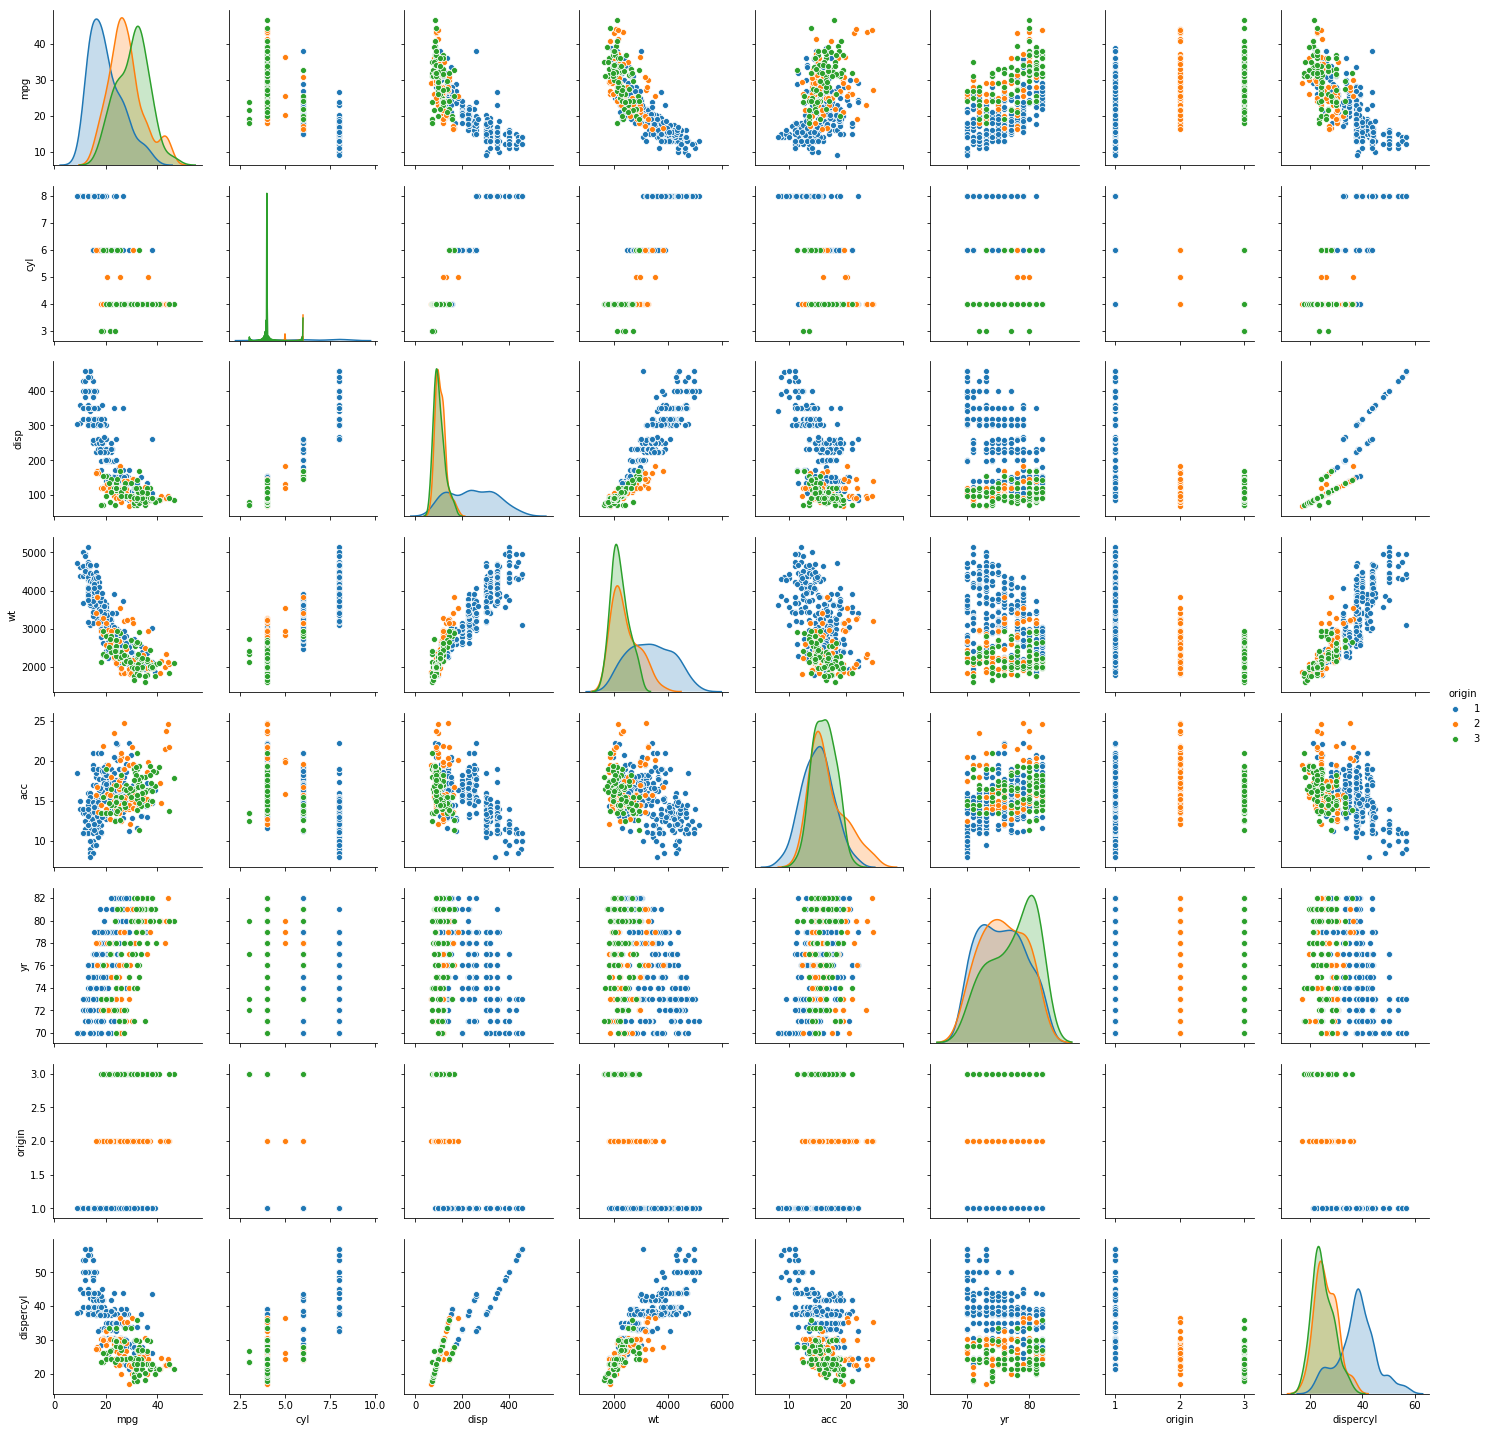

In [15]:
sns.pairplot(mpg_df_attr,diag_kind='kde',hue='origin')

In [16]:
mpg_df_attr=mpg_df_attr.replace('?',np.nan)

mpg_df_attr['origin']=mpg_df_attr['origin'].fillna(mpg_df_attr['origin'].median())

In [17]:
mpg_df_attr['origin']=mpg_df_attr['origin'].fillna(mpg_df_attr['origin'].median())

In [18]:
mpg_df_attr['mpg']=mpg_df_attr['mpg'].fillna(mpg_df_attr['mpg'].median())
mpg_df_attr['cyl']=mpg_df_attr['cyl'].fillna(mpg_df_attr['cyl'].median())

In [19]:
mpg_df_attr['disp']=mpg_df_attr['disp'].fillna(mpg_df_attr['disp'].median())
mpg_df_attr['hp']=mpg_df_attr['hp'].fillna(mpg_df_attr['hp'].median())
mpg_df_attr['wt']=mpg_df_attr['wt'].fillna(mpg_df_attr['wt'].median())
mpg_df_attr['acc']=mpg_df_attr['acc'].fillna(mpg_df_attr['acc'].median())

In [20]:
mpg_df_attr['yr']=mpg_df_attr['yr'].fillna(mpg_df_attr['yr'].median())


In [21]:
mpg_df_attr.dtypes

mpg          float64
cyl            int64
disp         float64
hp            object
wt           float64
acc          float64
yr             int64
origin         int64
dispercyl    float64
dtype: object

In [22]:
cluster_range=range(2,6)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=5)
    clusters.fit(mpg_df_attr)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
   
    

In [23]:
len(cluster_range)

4

In [24]:
len(cluster_errors)

4

In [25]:
 clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})

In [26]:
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.430338e+07
1,3,3.421882e+07
2,4,1.905996e+07
3,5,1.377423e+07


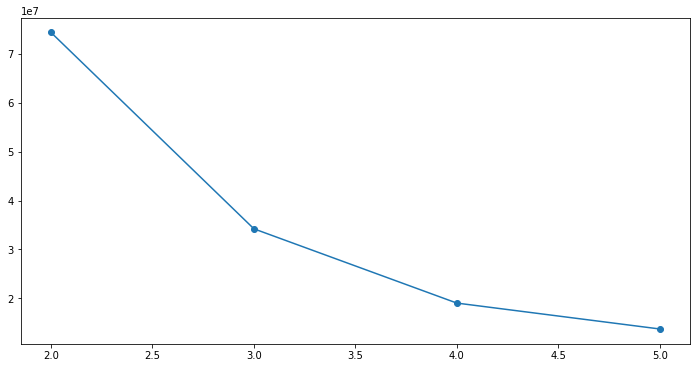

In [27]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker="o")

In [28]:
cluster=KMeans(n_clusters=4,random_state=2354)
cluster.fit(mpg_df_attr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

In [29]:
mpg_df_attr_copy=mpg_df_attr.copy(deep=True)



In [30]:
centroids=cluster.cluster_centers_
centroids

array([[1.39913043e+01, 8.00000000e+00, 3.56536232e+02, 1.65130435e+02,
        4.36659420e+03, 1.30420290e+01, 7.36086957e+01, 1.00000000e+00,
        4.45670290e+01],
       [3.07914894e+01, 3.97872340e+00, 9.82588652e+01, 7.36418440e+01,
        2.11143972e+03, 1.65914894e+01, 7.66170213e+01, 2.17021277e+00,
        2.46888298e+01],
       [1.84068966e+01, 6.63218391e+00, 2.58126437e+02, 1.15701149e+02,
        3.49324138e+03, 1.57310345e+01, 7.56781609e+01, 1.11494253e+00,
        3.87214559e+01],
       [2.42613861e+01, 4.76237624e+00, 1.59118812e+02, 9.57376238e+01,
        2.76543564e+03, 1.57247525e+01, 7.70891089e+01, 1.52475248e+00,
        3.32106436e+01]])

In [31]:
centroid_df=pd.DataFrame(centroids,columns=list(mpg_df_attr))
centroid_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,dispercyl
0,13.991304,8.000000,356.536232,165.130435,4366.594203,13.042029,73.608696,1.000000,44.567029
1,30.791489,3.978723,98.258865,73.641844,2111.439716,16.591489,76.617021,2.170213,24.688830
2,18.406897,6.632184,258.126437,115.701149,3493.241379,15.731034,75.678161,1.114943,38.721456
3,24.261386,4.762376,159.118812,95.737624,2765.435644,15.724752,77.089109,1.524752,33.210644


In [32]:
predication=cluster.predict(mpg_df_attr)
mpg_df_attr["grp"]=predication

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F9AE518>,
      dtype=object)

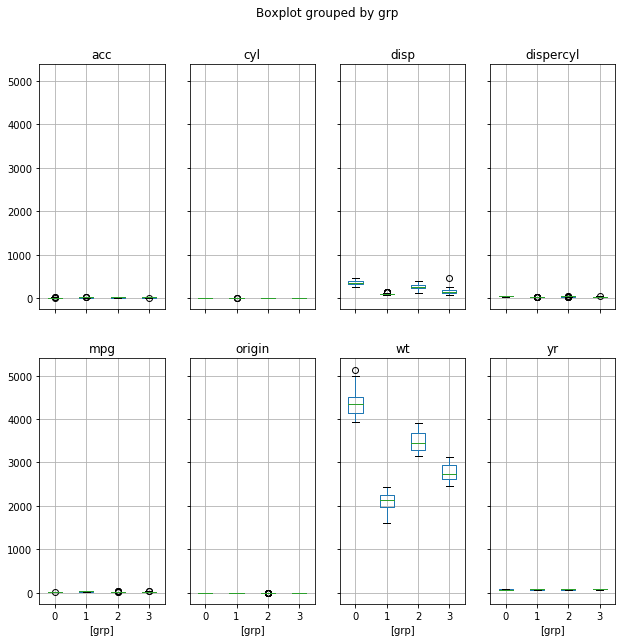

In [33]:
import matplotlib.pylab as plt
mpg_df_attr.boxplot(by='grp',layout=(2,4),figsize=(10,10))

In [34]:
data=mpg_df_attr
def replace(grp):
    median,std=grp.median(),grp.std()
    outliers=(grp-median).abs()>2*std
    grp[outliers]=grp.median()
    return grp

data_corrected=(data.groupby('grp').transform(replace))
concat_data=data_corrected.join(pd.DataFrame(mpg_df_attr['grp']))
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001066B5F8>,
      dtype=object)

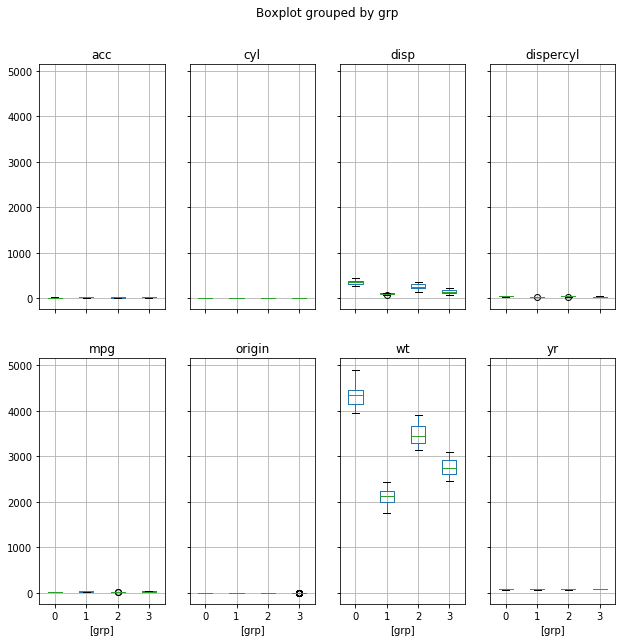

In [35]:
concat_data.boxplot(by='grp',layout=(2,4),figsize=(10,10))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


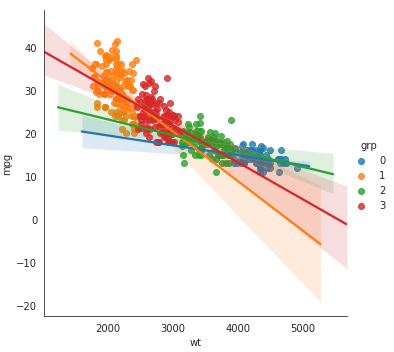

In [36]:
var="wt"
with sns.axes_style("white"):
    plot=sns.lmplot(var,'mpg',data=concat_data,hue='grp')
   

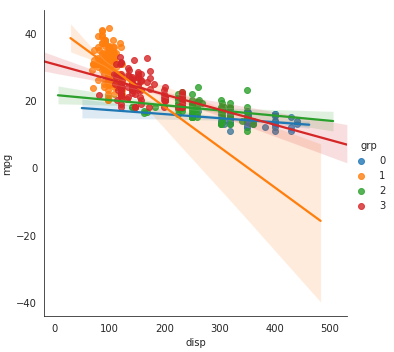

In [37]:
var="disp"
with sns.axes_style("white"):
    plot=sns.lmplot(var,'mpg',data=concat_data,hue='grp')

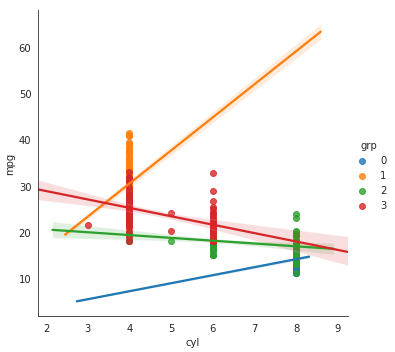

In [38]:
var="cyl"
with sns.axes_style("white"):
    plot=sns.lmplot(var,'mpg',data=concat_data,hue='grp')